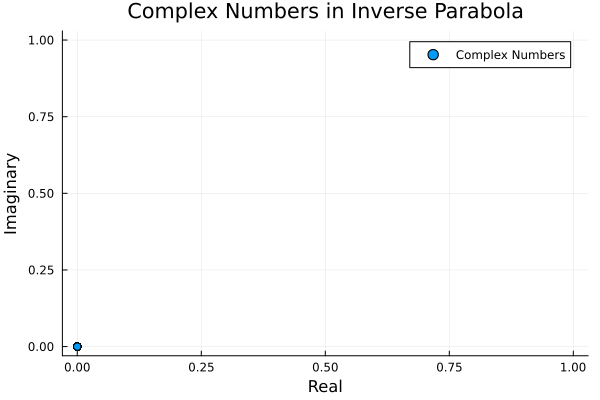

In [6]:
using Plots

# Function to generate complex numbers in an inverse parabola
function inverse_parabola_points(a, b, n)
    x = LinRange(-a, a, n)
    y = b * (x.^2 .- a^2)
    return x, y
end

# Generate complex numbers
t = 0.0:1.6276041666666667e-8:3.566080729166667e-5
a = 0.0
b = 1.6276041666666667e-8 # 0.5
n = length(t) # 100
x, y = inverse_parabola_points(a, b, n)

# Create complex numbers from x and y coordinates
z = x .+ (-y) * im

# Plotting
scatter(real(z), imag(z), label="Complex Numbers", xlabel="Real", ylabel="Imaginary")
plot!(title="Complex Numbers in Inverse Parabola")
